# Part 3. Model Comparison

We will explore 6 models and optimize each model to select the most appropriate model for production. The models that we'll try are: <br>

### Table of Content
- [Logistic Regression](#Logistic-Regression)
- [k-Nearest Neighbors Classifier](#k-Nearest-Neighbour-Classification)
- [Decision Tree Classifier](#Decision-Tree-Classifier)
- [Bagged Decision Tree Classifier](#Bagged-Decision-Tree-Classifier)
- [Random Forest Classifier](#Random-Forest-Classifier)
- [Ada Boosting Classifier](#Ada-Boosting-Classifier)
- [Multinomial Naive Bayes Classifier](#Multinomial-Naive-Bayes-Classifier)
- [Bernoulli Naive Bayes Classifier](#Bernoulli-Naive-Bayes-Classifier)
- [Gaussian Naive Bayes Classifier](#Gaussian-Naive-Bayes-Classifier)
- [Summary](#Summary)

## Importing Libraries

In [148]:
# Importing the usual
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Save model
import joblib

# Import NLP library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import scalers
from sklearn.preprocessing import StandardScaler

# Importing classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,\
AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# Importing Optimzation Tools
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,\
train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

# Import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,\
ConfusionMatrixDisplay

## Set table style

In [3]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## Read datasets

In [4]:
# Read csv
post_df = pd.read_csv('../datasets/coursera_edx_posts_cleaned.csv',index_col=[0])
cmt_df = pd.read_csv('../datasets/coursera_edx_comments_cleaned.csv',index_col=[0])

---

## Stopwords

In [5]:
# Manually adding stopwords
manual_stopwords = stopwords.words('english')

# List of keywords to add
edx_list = ['edx','http','www','org'] 
coursera_list = ['coursera']

# Add to stopwords
manual_stopwords.extend(edx_list)
manual_stopwords.extend(coursera_list)

## Modeling with Title

In [239]:
# Select X and y
X = post_df['title_lemma'].values.astype('U')
y = post_df['subreddit']

In [240]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [8]:
# Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1495,), (499,), (1495,), (499,))

In [9]:
# Check balance y_train
y_train.value_counts(normalize=True).round(4)

coursera    0.501
edx         0.499
Name: subreddit, dtype: float64

In [10]:
# Check balance y_test
y_test.value_counts(normalize=True).round(4)

coursera    0.501
edx         0.499
Name: subreddit, dtype: float64

**The baseline for all our models is 50%, which is the majority class**

---

## Functions to help with modeling

In [11]:
def fit_pipe(pipe,X_train,X_test,y_train,y_test):
    # Fit model
    pipe.fit(X_train,y_train)

    # Predict model
    y_pred = pipe.predict(X_test)
    
    # Show score
    print(f"Train Score: {pipe.score(X_train,y_train).round(4)}")
    print(f"Test Score: {pipe.score(X_test,y_test).round(4)}")
    
    # Print report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [12]:
def show_cm(pipe,X_train,X_test,y_train,y_test):
    # Fit model
    pipe.fit(X_train,y_train)

    # Predict model
    y_pred = pipe.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(cm,display_labels=['Cousera','EdX']).plot()
    plt.show();

In [13]:
def print_grid_results(model):
    # Printing grid search results
    
    print(f"Best Parameters:")
    print(model.best_params_)
    print(f"Best Scores:")
    print(round(model.best_score_,4))

---

## Model Comparsion

**Note:** In all modeling comparison different vectorization techniques were used and compared, however only the better performing vectorizer will be shown.

### Logistic Regression
[Back to Table of Content](#Table-of-Content)

__*Baseline of Logistic Regression*__

In [29]:
# Tf-Idf Vectorizer and Logistic Regression
# In this case Tf-Idf vectorizer works better than CountVectorizer

# Create Pipeline
lr_pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words=manual_stopwords)),
    ('lr', LogisticRegression(random_state=42))
])

In [30]:
fit_pipe(lr_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.9064
Test Score: 0.7395
Classification Report:
              precision    recall  f1-score   support

    coursera       0.75      0.72      0.74       250
         edx       0.73      0.76      0.74       249

    accuracy                           0.74       499
   macro avg       0.74      0.74      0.74       499
weighted avg       0.74      0.74      0.74       499



__*Optimization of Logistic Regression*__

RandomizedSearchCV to find the starting point

In [31]:
lr_params = {
    'tf__max_df':[0.25,0.5,0.75,1.0],
    'tf__max_features':[200,400,600,800,1000],
    'tf__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'lr__C':[1,0.5,0.25],
    'lr__n_jobs':[-1]
}

In [34]:
gr = RandomizedSearchCV(lr_pipe,
                        param_distributions=lr_params,
                        cv=5,
                        n_iter=4,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tf',
                                              TfidfVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('lr',
                                              LogisticRegression(random_state=42))]),
                   n_iter=4,
                   param_distributions={'lr__C': [1, 0.5, 0.25],
                                        'lr__n_jobs': [-1],
                                        'tf__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'tf__max_features': [200, 400, 600, 800,
                                                             1000],
                                        'tf__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)]},
                   random_state=42)

In [35]:
print_grid_results(gr)

Best Parameters:
{'tf__ngram_range': (1, 2), 'tf__max_features': 600, 'tf__max_df': 0.5, 'lr__n_jobs': -1, 'lr__C': 0.5}
Best Scores:
0.691


GridSearchCV to find the optimum hyperparameters

In [249]:
lr_params = {
    'tf__max_df':[0.4,0.5],
    'tf__max_features':[600,800,1000],
    'tf__ngram_range':[(1,1),(1,2)],
    'lr__C':[0.4,0.5,0.6],
    'lr__n_jobs':[-1]
}

In [250]:
lr_gs = GridSearchCV(lr_pipe,
                  param_grid=lr_params,
                  cv=5)

lr_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__C': [0.4, 0.5, 0.6], 'lr__n_jobs': [-1],
                         'tf__max_df': [0.4, 0.5],
                         'tf__max_features': [600, 800, 1000],
                         'tf__ngram_range': [(1, 1), (1, 2)]})

In [251]:
lr_gs.best_params_

{'lr__C': 0.5,
 'lr__n_jobs': -1,
 'tf__max_df': 0.4,
 'tf__max_features': 800,
 'tf__ngram_range': (1, 2)}

In [252]:
# Create Pipeline
lr_pipe_best = Pipeline([
    
    ('tf', TfidfVectorizer(max_df=lr_gs.best_params_['tf__max_df'],
                           max_features=lr_gs.best_params_['tf__max_features'],
                           ngram_range=lr_gs.best_params_['tf__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('lr', LogisticRegression(C=lr_gs.best_params_['lr__C'],
                              n_jobs=lr_gs.best_params_['lr__n_jobs'],
                              random_state=42))
])

Fit the model on GridSearchCV best parameter

In [253]:
fit_pipe(lr_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.8308
Test Score: 0.7074
Classification Report:
              precision    recall  f1-score   support

    coursera       0.72      0.68      0.70       250
         edx       0.69      0.74      0.72       249

    accuracy                           0.71       499
   macro avg       0.71      0.71      0.71       499
weighted avg       0.71      0.71      0.71       499



Confusion Matrix:


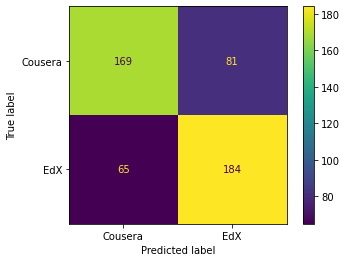

In [254]:
show_cm(lr_pipe_best,X_train,X_test,y_train,y_test)

In [255]:
# Save the model
joblib.dump(lr_gs, '../model/lr_model.pkl')

['../model/lr_model.pkl']

__Key Takeaway:__ <br>
- Default hyperparameters of Logistic Regression gives us an accuracy of 0.7395 (however this is an overfitting when we compare it to the results of training data of 0.9064)
- Optimized hyperparameters gives us an accuracy of 0.7074 (less overfit compared to training score of 0.8304)
- The **GridSearchCV optimized model** should be **more sustainable** in the long run while maintaining an acceptable **accuracy of 71%**

---

### k-Nearest Neighbour Classification
[Back to Table of Content](#Table-of-Content)

__*Baseline of kNN*__

In [42]:
# CountVectorizer and k-Neareset Neighbour Classification
# In this case CountVectorizer works better than Tf-IdfVectorizer

# Create Pipeline
kn_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words=manual_stopwords)),
    ('kn', KNeighborsClassifier())
])

In [43]:
fit_pipe(kn_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.7706
Test Score: 0.6293
Classification Report:
              precision    recall  f1-score   support

    coursera       0.66      0.54      0.60       250
         edx       0.61      0.71      0.66       249

    accuracy                           0.63       499
   macro avg       0.63      0.63      0.63       499
weighted avg       0.63      0.63      0.63       499



__*Optimization of k-Nearest Neighbour Classification*__

RandomizedSearchCV to find the starting point

In [44]:
kn_params = {
    'cv__max_df':[0.25,0.5,0.75,1.0],
    'cv__max_features':[200,400,600,800,1000],
    'cv__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'kn__n_neighbors':[5,10,15,20],
    'kn__n_jobs':[-1]
}

In [45]:
gr = RandomizedSearchCV(kn_pipe,
                        param_distributions=kn_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('kn', KNeighborsClassifier())]),
                   param_distributions={'cv__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'cv__max_features': [200, 400, 600, 800,
                                                             1000],
                                        'cv__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)],
                                        'kn__n_jobs': [-1],
                                        'kn__n_neighbors': [5, 10, 15, 20]},
                   random_state=42)

In [46]:
print_grid_results(gr)

Best Parameters:
{'kn__n_neighbors': 20, 'kn__n_jobs': -1, 'cv__ngram_range': (1, 2), 'cv__max_features': 200, 'cv__max_df': 0.75}
Best Scores:
0.6147


GridSearchCV to find the optimum hyperparameters

In [47]:
kn_params = {
    'cv__max_df':[0.5,1.0],
    'cv__max_features':[100,200],
    'cv__ngram_range':[(1,1),(1,2)],
    'kn__n_neighbors':[5,10],
    'kn__n_jobs':[-1]
}

In [48]:
kn_gs = GridSearchCV(kn_pipe,
                  param_grid=kn_params,
                  cv=5)

kn_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('kn', KNeighborsClassifier())]),
             param_grid={'cv__max_df': [0.5, 1.0],
                         'cv__max_features': [100, 200],
                         'cv__ngram_range': [(1, 1), (1, 2)],
                         'kn__n_jobs': [-1], 'kn__n_neighbors': [5, 10]})

In [49]:
# Create Pipeline
kn_pipe_best = Pipeline([
    ('cv', CountVectorizer(max_df=kn_gs.best_params_['cv__max_df'],
                           max_features=kn_gs.best_params_['cv__max_features'],
                           ngram_range=kn_gs.best_params_['cv__ngram_range'],
                           stop_words=manual_stopwords)),
    ('kn', KNeighborsClassifier(n_jobs=kn_gs.best_params_['kn__n_jobs'],
                                n_neighbors=kn_gs.best_params_['kn__n_neighbors']))
])

Fit the model on GridSearchCV best parameter

In [50]:
fit_pipe(kn_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.6696
Test Score: 0.6172
Classification Report:
              precision    recall  f1-score   support

    coursera       0.58      0.82      0.68       250
         edx       0.69      0.42      0.52       249

    accuracy                           0.62       499
   macro avg       0.64      0.62      0.60       499
weighted avg       0.64      0.62      0.60       499



Confusion Matrix:


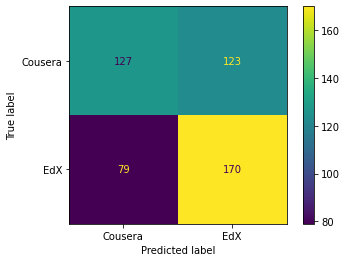

In [33]:
show_cm(kn_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- kNN is not the best model to tackle this task, we will use other models

----

### Decision Tree Classifier
[Back to Table of Content](#Table-of-Content)

In [51]:
# CountVectorizer and k-Neareset Neighbour Classification
# CountVectorizer works better in this case

# Create Pipeline
dt_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words=manual_stopwords)),
    ('dt', DecisionTreeClassifier())
])

In [52]:
fit_pipe(dt_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.9839
Test Score: 0.6733
Classification Report:
              precision    recall  f1-score   support

    coursera       0.68      0.65      0.67       250
         edx       0.67      0.69      0.68       249

    accuracy                           0.67       499
   macro avg       0.67      0.67      0.67       499
weighted avg       0.67      0.67      0.67       499



__*Optimization of Decision Tree Classification*__

RandomizedSearchCV to find the starting point

In [53]:
dt_params = {
    'cv__max_df':[0.25,0.5,0.75,1.0],
    'cv__max_features':[200,400,600,800,1000],
    'cv__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'dt__max_depth':[5,10,15,20],
    'dt__min_samples_split':[2,6,8,10],
    'dt__min_samples_leaf':[2,6,8,10],
    'dt__max_features':[5,10,15,20]
}

In [54]:
gr = RandomizedSearchCV(dt_pipe,
                        param_distributions=dt_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('dt', DecisionTreeClassifier())]),
                   param_distributions={'cv__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'cv__max_features': [200, 400, 600, 800,
                                                             1000],
                                        'cv__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)],
                                        'dt__max_depth': [5, 10, 15, 20],
                                        'dt__max_features': [5, 10, 15, 20],
                                        'dt__min_samples_leaf': [2, 6, 8, 10],
                                        'dt__min_samples_split': [2, 6, 8, 10]},
                   random_state=42)

In [55]:
print_grid_results(gr)

Best Parameters:
{'dt__min_samples_split': 10, 'dt__min_samples_leaf': 2, 'dt__max_features': 20, 'dt__max_depth': 15, 'cv__ngram_range': (1, 2), 'cv__max_features': 200, 'cv__max_df': 1.0}
Best Scores:
0.6154


GridSearchCV to find the optimum hyperparameters

In [97]:
dt_params = {
    'cv__max_df':[0.5],
    'cv__max_features':[200,300],
    'cv__ngram_range':[(1,1),(1,2)],
    'dt__min_samples_split':[4,8],
    'dt__min_samples_leaf':[4,8],
    'dt__max_depth':[60,80]
}

In [98]:
dt_gs = GridSearchCV(dt_pipe,
                  param_grid=dt_params,
                  cv=5)

dt_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'cv__max_df': [0.5], 'cv__max_features': [200, 300],
                         'cv__ngram_range': [(1, 1), (1, 2)],
                         'dt__max_depth': [60, 80],
                         'dt__min_samples_leaf': [4, 8],
                         'dt__min_samples_split': [4, 8]})

In [100]:
# Create Pipeline
dt_pipe_best = Pipeline([
    
    ('cv', CountVectorizer(max_df=dt_gs.best_params_['cv__max_df'],
                           max_features=dt_gs.best_params_['cv__max_features'],
                           ngram_range=dt_gs.best_params_['cv__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('dt', DecisionTreeClassifier(min_samples_split=dt_gs.best_params_\
                                  ['dt__min_samples_split'],
                                  min_samples_leaf=dt_gs.best_params_\
                                  ['dt__min_samples_leaf'],
                                  max_depth=dt_gs.best_params_['dt__max_depth']))
])

Fit the model on GridSearchCV best parameter

In [101]:
fit_pipe(dt_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.7512
Test Score: 0.6473
Classification Report:
              precision    recall  f1-score   support

    coursera       0.67      0.57      0.62       250
         edx       0.63      0.72      0.67       249

    accuracy                           0.65       499
   macro avg       0.65      0.65      0.65       499
weighted avg       0.65      0.65      0.65       499



Confusion Matrix:


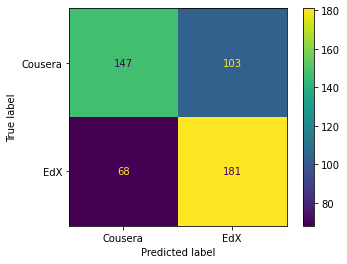

In [102]:
show_cm(dt_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- Default hyperparameters of Decision Tree gives us an accuracy of 0.67
- Optimized hyperparameters gives us an accuracy of 0.65
- However, the recall for `edx` is significantly higher, while on the other hand the recall for `coursera` is significantly lower
- This is not the best model to tackle this task when the false positive and false negative are equally important

----

#### Bagged Decision Tree Classifier
[Back to Table of Content](#Table-of-Content)

In [103]:
# Tf-Idf Vectorizer and k-Neareset Neighbour Classification
# For this case Tf-Idf Vectorizer works better than Count Vectorizer

# Create Pipeline
bg_pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words=manual_stopwords)),
    ('bg', BaggingClassifier())
])

In [104]:
fit_pipe(bg_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.9645
Test Score: 0.6533
Classification Report:
              precision    recall  f1-score   support

    coursera       0.67      0.62      0.64       250
         edx       0.64      0.69      0.67       249

    accuracy                           0.65       499
   macro avg       0.65      0.65      0.65       499
weighted avg       0.65      0.65      0.65       499



__*Optimization of Bagged Decision Tree Classification*__

RandomizedSearchCV to find the starting point

In [105]:
bg_params = {
    'tf__max_df':[0.25,0.5,0.75,1.0],
    'tf__max_features':[200,400,600,800,1000],
    'tf__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'bg__n_estimators':[10,20,30],
    'bg__max_samples':[5,10,15,20],
    'bg__max_features':[5,10,15,20]
}

In [106]:
gr = RandomizedSearchCV(bg_pipe,
                        param_distributions=bg_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tf',
                                              TfidfVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('bg', BaggingClassifier())]),
                   param_distributions={'bg__max_features': [5, 10, 15, 20],
                                        'bg__max_samples': [5, 10, 15, 20],
                                        'bg__n_estimators': [10, 20, 30],
                                        'tf__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'tf__max_features': [200, 400, 600, 800,
                                                             1000],
                                        'tf__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)]},
                   random_state=42)

In [107]:
print_grid_results(gr)

Best Parameters:
{'tf__ngram_range': (1, 1), 'tf__max_features': 800, 'tf__max_df': 0.25, 'bg__n_estimators': 30, 'bg__max_samples': 20, 'bg__max_features': 20}
Best Scores:
0.5378


GridSearchCV to find the optimum hyperparameters

In [114]:
bg_params = {
    'tf__max_df':[0.5,0.75],
    'tf__max_features':[75,100],
    'tf__ngram_range':[(1,1),(1,2)],
    'bg__n_estimators':[200,300],
    'bg__max_samples':[80,160],
    'bg__max_features':[20,40]
}

In [115]:
bg_gs = GridSearchCV(bg_pipe,
                     param_grid=bg_params,
                     cv=5)

bg_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('bg', BaggingClassifier())]),
             param_grid={'bg__max_features': [20, 40],
                         'bg__max_samples': [80, 160],
                         'bg__n_estimators': [200, 300],
                         'tf__max_df': [0.5, 0.75],
                         'tf__max_features': [75, 100],
                         'tf__ngram_range': [(1, 1), (1, 2)]})

In [116]:
bg_gs.best_params_

{'bg__max_features': 20,
 'bg__max_samples': 160,
 'bg__n_estimators': 300,
 'tf__max_df': 0.75,
 'tf__max_features': 100,
 'tf__ngram_range': (1, 1)}

In [117]:
# Create Pipeline
bg_pipe_best = Pipeline([
    
    ('tf', TfidfVectorizer(max_df=bg_gs.best_params_['tf__max_df'],
                           max_features=bg_gs.best_params_['tf__max_features'],
                           ngram_range=bg_gs.best_params_['tf__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('bg', BaggingClassifier(max_features=bg_gs.best_params_['bg__max_features'],
                             max_samples=bg_gs.best_params_['bg__max_samples'],
                             n_estimators=bg_gs.best_params_['bg__n_estimators']
                            ))
])

Fit the model on GridSearchCV best parameter

In [118]:
fit_pipe(bg_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.7579
Test Score: 0.6533
Classification Report:
              precision    recall  f1-score   support

    coursera       0.66      0.63      0.64       250
         edx       0.65      0.68      0.66       249

    accuracy                           0.65       499
   macro avg       0.65      0.65      0.65       499
weighted avg       0.65      0.65      0.65       499



Confusion Matrix:


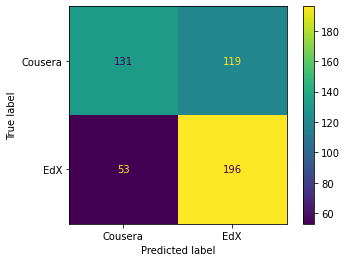

In [119]:
show_cm(bg_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- Default hyperparameters of Bagged Decision Tree gives us an accuracy of 0.6533
- Optimizing give us an accuracy of 0.6313, which is not an improvement
- Default hyperparameters performs better, and other models performs better

---

#### Random Forest Classifier
[Back to Table of Content](#Table-of-Content)

In [120]:
# CountVectorizer and k-Neareset Neighbour Classification
# CountVectorizer works better than Tf-Idf in this case
# Create Pipeline

rf_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words=manual_stopwords)),
    ('rf', RandomForestClassifier())
])

In [121]:
fit_pipe(rf_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.9839
Test Score: 0.7054
Classification Report:
              precision    recall  f1-score   support

    coursera       0.71      0.70      0.70       250
         edx       0.70      0.71      0.71       249

    accuracy                           0.71       499
   macro avg       0.71      0.71      0.71       499
weighted avg       0.71      0.71      0.71       499



__*Optimization of Random Forest Classification*__

RandomizedSearchCV to find the starting point

In [122]:
rf_params = {
    'cv__max_df':[0.25,0.5,0.75,1.0],
    'cv__max_features':[200,400,600,800,1000],
    'cv__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'rf__n_estimators':[10,20,30],
    'rf__max_depth':[10,20,30],
    'rf__max_samples':[5,10,15,20],
    'rf__max_features':[5,10,15,20]
}

In [123]:
gr = RandomizedSearchCV(rf_pipe,
                        param_distributions=rf_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('rf', RandomForestClassifier())]),
                   param_distributions={'cv__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'cv__max_features': [200, 400, 600, 800,
                                                             1000],
                                        'cv__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)],
                                        'rf__max_depth': [10, 20, 30],
                                        'rf__max_features': [5, 10, 15, 20],
                                        'rf__max_samples': [5, 10, 15, 20],
                                        'rf__n_estimators': [10, 20, 30]},
                   random_state=42)

In [124]:
print_grid_results(gr)

Best Parameters:
{'rf__n_estimators': 30, 'rf__max_samples': 15, 'rf__max_features': 20, 'rf__max_depth': 30, 'cv__ngram_range': (1, 2), 'cv__max_features': 400, 'cv__max_df': 0.25}
Best Scores:
0.5773


GridSearchCV to find the optimum hyperparameters

In [132]:
rf_params = {
    'cv__max_df':[0.1,0.25],
    'cv__max_features':[200,400],
    'cv__ngram_range':[(1,1),(1,2)],
    'rf__n_estimators':[60,120],
    'rf__max_depth':[15,30],
    'rf__max_samples':[20,40],
    'rf__max_features':[60,120]
}

In [133]:
rf_gs = GridSearchCV(rf_pipe,
                  param_grid=rf_params,
                  cv=5)

rf_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cv__max_df': [0.1, 0.25],
                         'cv__max_features': [200, 400],
                         'cv__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [15, 30],
                         'rf__max_features': [60, 120],
                         'rf__max_samples': [20, 40],
                         'rf__n_estimators': [60, 120]})

In [134]:
rf_gs.best_params_

{'cv__max_df': 0.25,
 'cv__max_features': 200,
 'cv__ngram_range': (1, 1),
 'rf__max_depth': 30,
 'rf__max_features': 60,
 'rf__max_samples': 40,
 'rf__n_estimators': 120}

In [135]:
# Create Pipeline
rf_pipe_best = Pipeline([
    
    ('cv', CountVectorizer(max_df=rf_gs.best_params_['cv__max_df'],
                           max_features=rf_gs.best_params_['cv__max_features'],
                           ngram_range=rf_gs.best_params_['cv__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('rf', RandomForestClassifier(max_depth=rf_gs.best_params_\
                                  ['rf__max_features'],
                                  max_features=rf_gs.best_params_\
                                  ['rf__max_features'],
                                  max_samples=rf_gs.best_params_\
                                  ['rf__max_samples'],
                                  n_estimators=rf_gs.best_params_\
                                  ['rf__n_estimators']
                            ))
])

Fit the model on GridSearchCV best parameter

In [136]:
fit_pipe(rf_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.6763
Test Score: 0.6393
Classification Report:
              precision    recall  f1-score   support

    coursera       0.81      0.37      0.51       250
         edx       0.59      0.91      0.72       249

    accuracy                           0.64       499
   macro avg       0.70      0.64      0.61       499
weighted avg       0.70      0.64      0.61       499



Confusion Matrix:


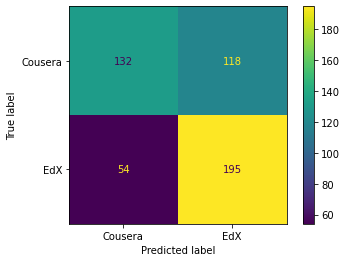

In [137]:
show_cm(bg_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- Default hyperparameters of Random Forest Classfier gives us an accuracy of 0.667
- Optimization gives us a parameter of 0.635
- This is not an improvement, but more of an overfit
- We will select other models

---

#### Ada Boosting Classifier
[Back to Table of Content](#Table-of-Content)

In [138]:
# CountVectorizer and k-Neareset Neighbour Classification

# Create Pipeline
ad_pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words=manual_stopwords)),
    ('ad', AdaBoostClassifier())
])

In [139]:
fit_pipe(ad_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.7258
Test Score: 0.6493
Classification Report:
              precision    recall  f1-score   support

    coursera       0.83      0.38      0.52       250
         edx       0.60      0.92      0.72       249

    accuracy                           0.65       499
   macro avg       0.71      0.65      0.62       499
weighted avg       0.71      0.65      0.62       499



__*Optimization of Ada Boosting Classification*__

RandomizedSearchCV to find the starting point

In [140]:
ad_params = {
    'tf__max_df':[0.25,0.5,0.75,1.0],
    'tf__max_features':[200,400,600,800,1000],
    'tf__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'ad__n_estimators':[10,20,30],
    'ad__learning_rate':[0.5,1]
}

In [141]:
gr = RandomizedSearchCV(ad_pipe,
                        param_distributions=ad_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tf',
                                              TfidfVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('ad', AdaBoostClassifier())]),
                   param_distributions={'ad__learning_rate': [0.5, 1],
                                        'ad__n_estimators': [10, 20, 30],
                                        'tf__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'tf__max_features': [200, 400, 600, 800,
                                                             1000],
                                        'tf__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)]},
                   random_state=42)

In [142]:
print_grid_results(gr)

Best Parameters:
{'tf__ngram_range': (1, 1), 'tf__max_features': 800, 'tf__max_df': 0.25, 'ad__n_estimators': 30, 'ad__learning_rate': 0.5}
Best Scores:
0.6441


GridSearchCV to find the optimum hyperparameters

In [143]:
ad_params = {
    'tf__max_df':[0.15,0.25],
    'tf__max_features':[800,1000],
    'tf__ngram_range':[(1,1),(1,2)],
    'ad__n_estimators':[30,60],
    'ad__learning_rate':[0.25,0.5]
}

In [144]:
ad_gs = GridSearchCV(ad_pipe,
                  param_grid=ad_params,
                  cv=5)

ad_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('ad', AdaBoostClassifier())]),
             param_grid={'ad__learning_rate': [0.25, 0.5],
                         'ad__n_estimators': [30, 60],
                         'tf__max_df': [0.15, 0.25],
                         'tf__max_features': [800, 1000],
                         'tf__ngram_range': [(1, 1), (1, 2)]})

In [145]:
# Create Pipeline
ad_pipe_best = Pipeline([
    
    ('tf', TfidfVectorizer(max_df=ad_gs.best_params_['tf__max_df'],
                           max_features=ad_gs.best_params_['tf__max_features'],
                           ngram_range=ad_gs.best_params_['tf__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('ad', AdaBoostClassifier(n_estimators=ad_gs.best_params_\
                                  ['ad__n_estimators'],
                              learning_rate=ad_gs.best_params_\
                                  ['ad__learning_rate']
                            ))
])

Fit the model on GridSearchCV best parameter

In [146]:
fit_pipe(ad_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.7271
Test Score: 0.6533
Classification Report:
              precision    recall  f1-score   support

    coursera       0.81      0.40      0.54       250
         edx       0.60      0.90      0.72       249

    accuracy                           0.65       499
   macro avg       0.70      0.65      0.63       499
weighted avg       0.71      0.65      0.63       499



Confusion Matrix:


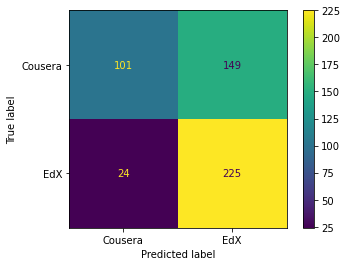

In [147]:
show_cm(ad_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- Ada Boosting gives us an accuracy of 0.6473 from the default settings
- Optimization helps improves the accuracy to 0.6573
- However, other simpler model gives better results

---

#### Multinomial Naive Bayes Classifier
[Back to Table of Content](#Table-of-Content)

In [153]:
# CountVectorizer and Multinomial Naive Bayes
# CountVectorizer works better than Tf-Idf in this case
# Create Pipeline

nb_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words=manual_stopwords)),
    ('nb', MultinomialNB())
])

In [154]:
fit_pipe(nb_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.8763
Test Score: 0.7335
Classification Report:
              precision    recall  f1-score   support

    coursera       0.71      0.79      0.75       250
         edx       0.76      0.68      0.72       249

    accuracy                           0.73       499
   macro avg       0.74      0.73      0.73       499
weighted avg       0.74      0.73      0.73       499



__*Optimization of Random Forest Classification*__

RandomizedSearchCV to find the starting point

In [163]:
nb_params = {
    'cv__max_df':[0.25,0.5,0.75,1.0],
    'cv__max_features':[600,800,1000,1200,1400],
    'cv__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'nb__alpha':[1,10,20,30]
}

In [164]:
gr = RandomizedSearchCV(nb_pipe,
                        param_distributions=nb_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('nb', MultinomialNB())]),
                   param_distributions={'cv__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'cv__max_features': [600, 800, 1000,
                                                             1200, 1400],
                                        'cv__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)],
                                        'nb__alpha': [1, 10, 20, 30]},
                   random_state=42)

In [165]:
print_grid_results(gr)

Best Parameters:
{'nb__alpha': 20, 'cv__ngram_range': (1, 2), 'cv__max_features': 1400, 'cv__max_df': 0.75}
Best Scores:
0.6849


GridSearchCV to find the optimum hyperparameters

In [237]:
nb_params = {
    'cv__max_df':[0.25,0.5,0.75],
    'cv__max_features':[1200,1400,1600],
    'cv__ngram_range':[(1,1),(1,2)],
    'nb__alpha':[10,20]
}

In [241]:
nb_gs = GridSearchCV(nb_pipe,
                  param_grid=nb_params,
                  cv=5)

nb_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('nb', MultinomialNB())]),
             param_grid={'cv__max_df': [0.25, 0.5, 0.75],
                         'cv__max_features': [1200, 1400, 1600],
                         'cv__ngram_range': [(1, 1), (1, 2)],
                         'nb__alpha': [10, 20]})

In [242]:
nb_gs.best_params_

{'cv__max_df': 0.5,
 'cv__max_features': 1600,
 'cv__ngram_range': (1, 1),
 'nb__alpha': 20}

In [243]:
# Create Pipeline
rf_pipe_best = Pipeline([
    
    ('cv', CountVectorizer(max_df=nb_gs.best_params_['cv__max_df'],
                           max_features=nb_gs.best_params_['cv__max_features'],
                           ngram_range=nb_gs.best_params_['cv__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('nb', MultinomialNB(alpha=nb_gs.best_params_['nb__alpha']))
])

Fit the model on GridSearchCV best parameter

In [244]:
fit_pipe(rf_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.796
Test Score: 0.7134
Classification Report:
              precision    recall  f1-score   support

    coursera       0.68      0.80      0.74       250
         edx       0.75      0.63      0.69       249

    accuracy                           0.71       499
   macro avg       0.72      0.71      0.71       499
weighted avg       0.72      0.71      0.71       499



Confusion Matrix:


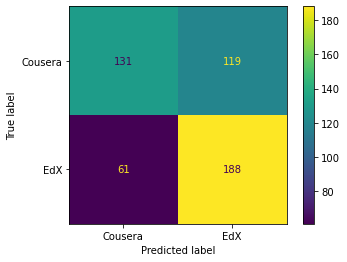

In [245]:
show_cm(bg_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- Multi-nomial NB gives the best results so far with 71% accuracy on the testing data
- However, there is an imbalance in recall for `coursera` and `edx`

---

#### Bernoulli Naive Bayes Classifier
[Back to Table of Content](#Table-of-Content)

In [260]:
# CountVectorizer and Multinomial Naive Bayes
# CountVectorizer works better than Tf-Idf in this case
# Create Pipeline

bn_pipe = Pipeline([
    ('cv', CountVectorizer(stop_words=manual_stopwords)),
    ('bn', BernoulliNB())
])

In [261]:
fit_pipe(bn_pipe,X_train,X_test,y_train,y_test)

Train Score: 0.8662
Test Score: 0.7074
Classification Report:
              precision    recall  f1-score   support

    coursera       0.67      0.80      0.73       250
         edx       0.76      0.61      0.68       249

    accuracy                           0.71       499
   macro avg       0.72      0.71      0.70       499
weighted avg       0.72      0.71      0.70       499



__*Optimization of Random Forest Classification*__

RandomizedSearchCV to find the starting point

In [263]:
bn_params = {
    'cv__max_df':[0.25,0.5,0.75,1.0],
    'cv__max_features':[600,800,1000,1200,1400],
    'cv__ngram_range':[(1,1),(1,2),(2,2),(3,3)],
    'bn__alpha':[1,10,20,30]
}

In [264]:
gr = RandomizedSearchCV(bn_pipe,
                        param_distributions=bn_params,
                        cv=5,
                        random_state=42)

gr.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv',
                                              CountVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('bn', BernoulliNB())]),
                   param_distributions={'bn__alpha': [1, 10, 20, 30],
                                        'cv__max_df': [0.25, 0.5, 0.75, 1.0],
                                        'cv__max_features': [600, 800, 1000,
                                                             1200, 1400],
                                        'cv__ngram_range': [(1, 1), (1, 2),
                                                            (2, 2), (3, 3)]},
                   random_state=42)

In [265]:
print_grid_results(gr)

Best Parameters:
{'cv__ngram_range': (1, 2), 'cv__max_features': 800, 'cv__max_df': 0.5, 'bn__alpha': 1}
Best Scores:
0.6823


GridSearchCV to find the optimum hyperparameters

In [266]:
nb_params = {
    'cv__max_df':[0.25,0.5,0.75],
    'cv__max_features':[1200,1400,1600],
    'cv__ngram_range':[(1,1),(1,2)],
    'nb__alpha':[10,20]
}

In [267]:
nb_gs = GridSearchCV(nb_pipe,
                  param_grid=nb_params,
                  cv=5)

nb_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('nb', MultinomialNB())]),
             param_grid={'cv__max_df': [0.25, 0.5, 0.75],
                         'cv__max_features': [1200, 1400, 1600],
                         'cv__ngram_range': [(1, 1), (1, 2)],
                         'nb__alpha': [10, 20]})

In [268]:
nb_gs.best_params_

{'cv__max_df': 0.5,
 'cv__max_features': 1600,
 'cv__ngram_range': (1, 1),
 'nb__alpha': 20}

In [269]:
# Create Pipeline
rf_pipe_best = Pipeline([
    
    ('cv', CountVectorizer(max_df=nb_gs.best_params_['cv__max_df'],
                           max_features=nb_gs.best_params_['cv__max_features'],
                           ngram_range=nb_gs.best_params_['cv__ngram_range'],
                           stop_words=manual_stopwords)),
    
    ('nb', MultinomialNB(alpha=nb_gs.best_params_['nb__alpha']))
])

Fit the model on GridSearchCV best parameter

In [270]:
fit_pipe(rf_pipe_best,X_train,X_test,y_train,y_test)

Train Score: 0.796
Test Score: 0.7134
Classification Report:
              precision    recall  f1-score   support

    coursera       0.68      0.80      0.74       250
         edx       0.75      0.63      0.69       249

    accuracy                           0.71       499
   macro avg       0.72      0.71      0.71       499
weighted avg       0.72      0.71      0.71       499



Confusion Matrix:


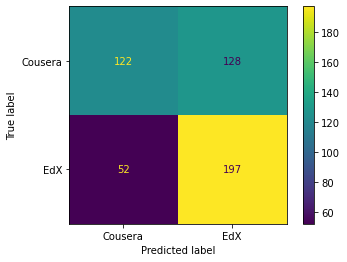

In [271]:
show_cm(bg_pipe_best,X_train,X_test,y_train,y_test)

__Key Takeaway:__ <br>
- Similarly to Multi-nomial NB, the Bernoulli NB gives the best results so far with 71% accuracy on the testing data
- However, there is an imbalance in recall for `coursera` and `edx`

---

#### Gaussian Naive Bayes Classifier
[Back to Table of Content](#Table-of-Content)

In [198]:
# Create a function to vectorize and return dataframe

def vec_to_df(vec=CountVectorizer(),data=post_df['title']):
    # Vectorize using own choice and return vectorized dataframe
    
    # fit transform title
    d = vec.fit_transform(data)
    
    # Storing into a DataFrame
    df_vec = pd.DataFrame(d.todense(),columns=vec.get_feature_names_out())
    
    return df_vec

In [206]:
# Select X and y
X = post_df['title_lemma'].values.astype('U')
y = post_df['subreddit']

In [225]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [226]:
# Instantiate
tf = TfidfVectorizer()

In [227]:
# Fit transform train
X_train_vec = tf.fit_transform(X_train)

In [228]:
# Transform test
X_test_vec = tf.transform(X_test)

In [229]:
# Convert X_train to dataframe
X_train = pd.DataFrame(X_train_vec.todense(),columns=tf.get_feature_names_out())

In [230]:
# Convert X_test to dataframe
X_test = pd.DataFrame(X_test_vec.todense(),columns=tf.get_feature_names_out())

In [231]:
# Instantiate model
gn = GaussianNB()

In [232]:
# Fit the model
gn.fit(X_train,y_train)

GaussianNB()

In [233]:
# Predict
y_pred = gn.predict(X_test)

In [234]:
# Training score
gn.score(X_train,y_train)

0.9036789297658863

In [235]:
# Test score
gn.score(X_test,y_test)

0.7014028056112225

In [236]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    coursera       0.67      0.80      0.73       250
         edx       0.75      0.60      0.67       249

    accuracy                           0.70       499
   macro avg       0.71      0.70      0.70       499
weighted avg       0.71      0.70      0.70       499



__Key Takeaway:__ <br>
- Gaussian Naive Bayes gives similar results to Multinomial Naive Bayes
- We will stick with Multinomial Naive Bayes, since the recall balance was better

---

## Summary
[Back to Table of Content](#Table-of-Content)

**Logistic Regression  - Selected as final model**<br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.91|0.83|
|test accuracy|0.74|0.71|
|coursera recall|0.72|0.68|
|edx recall|0.76|0.74|
|f1-score|0.74|0.71|

**Decision:** <br>
The optimize model will be **more sustainable** and should perform better with more data. Other model produces the same **accuracy of 71%** but the balance in recall makes this model the **best option in the long term.**

**k-Nearest Neighbor** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.77|0.67|
|test accuracy|0.63|0.62|
|coursera recall|0.54|0.82|
|edx recall|0.71|0.42|
|f1-score|0.63|0.62|

**Decision:** <br>
Both models are not suitable for this problem

**Decision Tree** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.99|0.75|
|test accuracy|0.67|0.65|
|coursera recall|0.65|0.57|
|edx recall|0.69|0.72|
|f1-score|0.67|0.65|

**Decision:** <br>
Optimized version reduces overfitting, while maintaining the same accuracy

**Bagged Decision Tree** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.96|0.76|
|test accuracy|0.65|0.65|
|coursera recall|0.62|0.63|
|edx recall|0.69|0.68|
|f1-score|0.65|0.65|

**Decision:** <br>
Optimized version reduces overfitting, improves accuracy as well as the f1-score. This is the best model so far.

**Random Forest Classifier** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.98|0.67|
|test accuracy|0.71|0.64|
|coursera recall|0.70|0.37|
|edx recall|0.71|0.91|
|f1-score|0.71|0.64|

**Decision:** <br>
Optimized version reduces overfitting, maintaining the accuracy as well as the f1-score.

**Ada Boosting Classifier** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.72|0.73|
|test accuracy|0.65|0.65|
|coursera recall|0.38|0.40|
|edx recall|0.92|0.90|
|f1-score|0.65|0.65|

**Decision:** <br>
The differences in recall of both classes is unacceptable, other model works better.

**Multinomial Naive Bayes Classifier** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.88|0.80|
|test accuracy|0.73|0.71|
|coursera recall|0.79|0.80|
|edx recall|0.68|0.63|
|f1-score|0.73|0.71|

**Decision:** <br>
Good accuracy, but imbalance recall will not benefit us long term

**Bernoulli Naive Bayes Classifier** <br>

|Model|Baseline|Optimized|
|---|---|---|
|train accuracy|0.87|0.80|
|test accuracy|0.71|0.71|
|coursera recall|0.80|0.80|
|edx recall|0.61|0.63|
|f1-score|0.71|0.71|

**Decision:** <br>
Good accuracy, but imbalance recall will not benefit us long term

**Gaussian Naive Bayes Classifier** <br>

|Model|Baseline|
|---|---|
|train accuracy|0.90|
|test accuracy|0.70|
|coursera recall|0.80|
|edx recall|0.60|
|f1-score|0.70|

**Decision:** <br>
Good accuracy, but it seems to be an overfit, other model works better.